# Heart rate & Activity data Statistic Analysis

## Raw signal plots

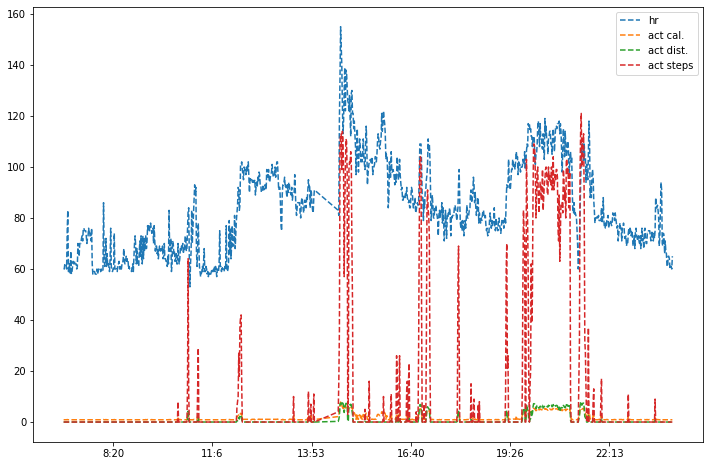

In [69]:
import os
os.getcwd()
os.chdir(path="/home/hyojinju/SIGNAL/")

from emotion_tracker import EmotionTracker
import matplotlib.pyplot as plt
from matplotlib import ticker

date = "2022-11-14"
emo = EmotionTracker()
emo.run(date)
start_index = 400
end_index = 8000


time = [item["time"] for item in emo.hr_list[start_index:end_index]]
hr = [item["value"] for item in emo.hr_list[start_index:end_index]]
act_calories_dict = dict([(item["time"], {"level": item["level"], "value": item["value"], "mets": item["mets"]}) for item in emo.act_calories_list])
act_distance_dict = dict([(item["time"], 100*item["value"]) for item in emo.act_distance_list])
act_steps_dict = dict([(item["time"], item["value"]) for item in emo.act_steps_list])

time_int = [int(item[:2]) * 3600 + int(item[3:5]) * 60 + int(item[6:]) for item in time]
act_calories_list = []
act_distance_list = []
act_steps_list = []

for item in time:
    act_calories_list.append(act_calories_dict[item]["value"])
    act_distance_list.append(act_distance_dict[item])
    act_steps_list.append(act_steps_dict[item])

@ticker.FuncFormatter
def timeformat(x, pos):
    return f'{int(x / 3600)}:{int((x % 3600)/60)}'

fig0, ax0 = plt.subplots(figsize=(12, 8))
#plt.rcParams["figure.figsize"] = (12, 8)

ax0.plot(time_int, hr, linestyle="--",label="hr")
ax0.plot(time_int, act_calories_list, linestyle="--",label="act cal.")
ax0.plot(time_int, act_distance_list, linestyle="--",label="act dist.")
ax0.plot(time_int, act_steps_list, linestyle="--",label="act steps")
ax0.xaxis.set_major_formatter(timeformat)
plt.legend()
plt.show()




## Normalized Signal plots

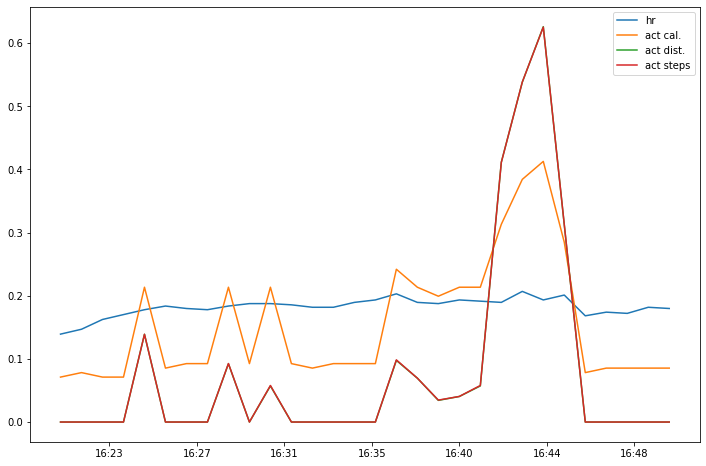

In [41]:
import numpy as np
from sklearn.preprocessing import normalize

norm_hr = normalize([np.array(hr)])[0]
norm_act_calories_list = normalize([np.array(act_calories_list)])[0]
norm_act_distance_list = normalize([np.array(act_distance_list)])[0]
norm_act_steps_list = normalize([np.array(act_steps_list)])[0]

fig1, ax1 = plt.subplots(figsize=(12, 8))
# plt.rcParams["figure.figsize"] = (12,8)

ax1.plot(time_int, norm_hr, label="hr")
ax1.plot(time_int, norm_act_calories_list, label="act cal.")
ax1.plot(time_int, norm_act_distance_list, label="act dist.")
ax1.plot(time_int, norm_act_steps_list, label="act steps")
ax1.xaxis.set_major_formatter(timeformat)

plt.legend()
plt.show()

## Cross Correlation
Check whether there is a time shift between HR and Activity time series. => *No time shift.*

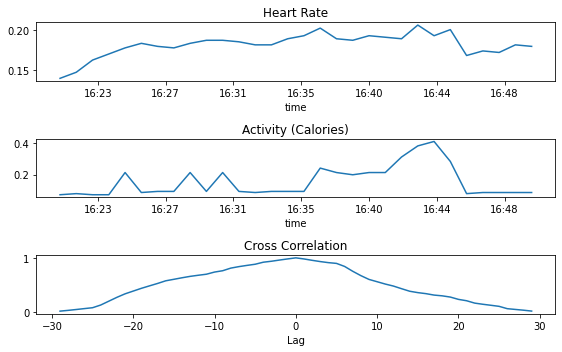

In [42]:
from scipy import signal

corr = signal.correlate(norm_hr, norm_act_calories_list, method='fft')
corr /= np.max(corr)
lags = signal.correlation_lags(len(norm_hr), len(norm_act_calories_list))


fig2, (ax2_sig1, ax2_sig2, ax2_corr) = plt.subplots(3, 1, figsize=(8, 5))
ax2_sig1.plot(time_int, norm_hr)
ax2_sig1.set_title("Heart Rate")
ax2_sig1.set_xlabel("time")
ax2_sig1.xaxis.set_major_formatter(timeformat)

ax2_sig2.plot(time_int, norm_act_calories_list)
ax2_sig2.set_title("Activity (Calories)")
ax2_sig2.set_xlabel("time")
ax2_sig2.xaxis.set_major_formatter(timeformat)

ax2_corr.plot(lags, corr)
ax2_corr.set_title("Cross Correlation")
ax2_corr.set_xlabel("Lag")

fig2.tight_layout()
plt.show()

## Correlation between HR and Activity time series
Approach 1: If the correlation between the HR and Activity time series is low, it might indicate there are HR peaks those are not caused by physical activities.

In [43]:
import scipy.stats
import json

cal_steps = scipy.stats.pearsonr(norm_act_calories_list, norm_act_steps_list)
cal_dist = scipy.stats.pearsonr(norm_act_calories_list, norm_act_distance_list)
step_dist = scipy.stats.pearsonr(norm_act_steps_list, norm_act_distance_list)
hr_cal = scipy.stats.pearsonr(norm_hr, norm_act_calories_list)
hr_steps = scipy.stats.pearsonr(norm_hr, norm_act_steps_list)

with open(f'corr.json', 'a') as file:
    json.dump({
        "date" : date,
        "corr": {
            "cal_steps": cal_steps,
            "cal_dist": cal_dist,
            "steps_dist": step_dist,
            "hr_cal": hr_cal,
            "hr_steps": hr_steps
        }
    }, file)

## Comparison within a time window
Compare HR and activity within a time window.

### Plot HR signal in 1 sec granularity

550 550


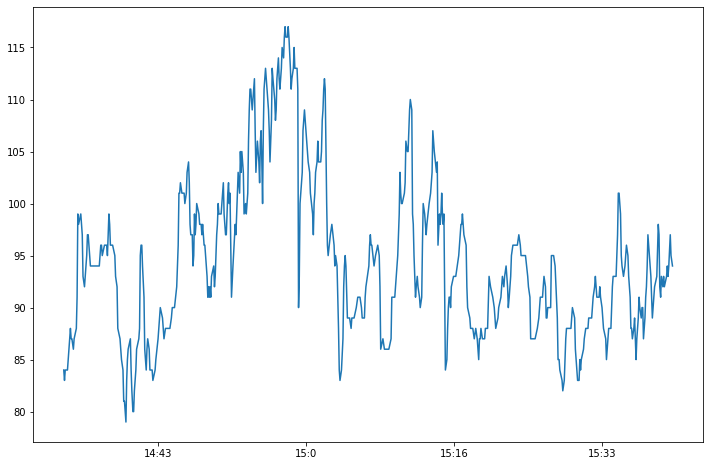

In [22]:
date = "2022-11-14"
emo2 = EmotionTracker()
emo2.run(date, "1sec")

start = 7100
end = 7650

time = [item["time"] for item in emo2.hr_list[start:end]]
hr = [item["value"] for item in emo2.hr_list[start:end]]

time_int = [int(item[:2]) * 3600 + int(item[3:5]) * 60 + int(item[6:]) for item in time]

print(len(hr), len(time))

fig3, ax3 = plt.subplots(figsize=(12, 8))
ax3.xaxis.set_major_formatter(timeformat)
ax3.plot(time_int, hr)

plt.show()


### Checking correlation change within a time window
With the same 1min granularity, check the correlation between HR and activity signals within a time window.

1351 1351 1351 1351
90


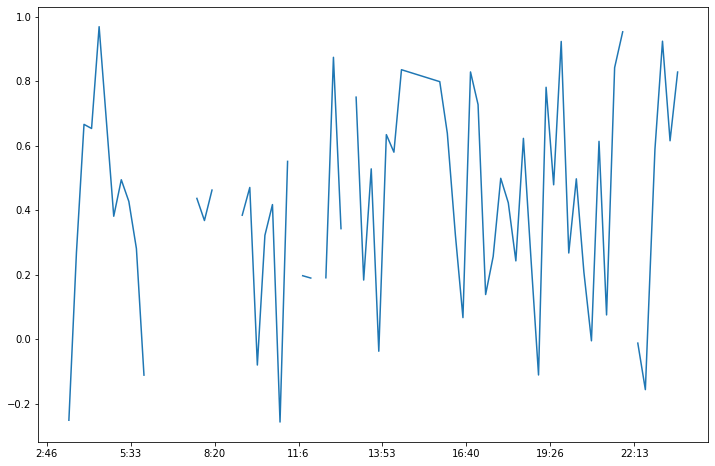

In [68]:
date = "2022-11-20"

emo3 = EmotionTracker()
emo3.run(date)

start_index = 0
end_index = len(emo3.hr_list) + 1
time_window = 15

time = [item["time"] for item in emo3.hr_list[start_index:end_index]]
hr = [item["value"] for item in emo3.hr_list[start_index:end_index]]
act_calories_dict = dict([(item["time"], {"level": item["level"], "value": item["value"], "mets": item["mets"]}) for item in emo3.act_calories_list])
act_distance_dict = dict([(item["time"], 100*item["value"]) for item in emo3.act_distance_list])
act_steps_dict = dict([(item["time"], item["value"]) for item in emo3.act_steps_list])

time_int = [int(item[:2]) * 3600 + int(item[3:5]) * 60 + int(item[6:]) for item in time]
act_calories_list = []
act_distance_list = []
act_steps_list = []

for item in time:
    act_calories_list.append(act_calories_dict[item]["value"])
    act_distance_list.append(act_distance_dict[item])
    act_steps_list.append(act_steps_dict[item])

print(len(time), len(act_calories_list), len(act_distance_list), len(act_steps_list))

hr_cal_corr_list = []
hr_steps_corr_list = []
cal_steps_corr_list = []
block_start_list = []
corr_dict = {}

for i in range(0, len(time)+1, time_window):
    start = i
    end = i+time_window
    if len(hr[start:end]) < 2:
        break
    hr_cal_corr = scipy.stats.pearsonr(hr[start:end], act_calories_list[start:end])
    hr_steps_corr = scipy.stats.pearsonr(hr[start:end], act_steps_list[start:end])
    cal_steps_corr = scipy.stats.pearsonr(act_calories_list[start:end], act_steps_list[start:end])

    block_start_list.append(time_int[i])
    hr_cal_corr_list.append(hr_cal_corr.statistic)

    corr_dict[time[i]] = {
        "hr_cal_corr": (hr_cal_corr.statistic, hr_cal_corr.pvalue),
        "hr_steps_corr": (hr_steps_corr.statistic, hr_steps_corr.pvalue),
        "cal_steps_corr": (cal_steps_corr.statistic, cal_steps_corr.pvalue)
    }
print(len(block_start_list))

with open(f'{date}_{time_window}.json', 'w') as file:
    json.dump(corr_dict, file)

fig4, ax4 = plt.subplots(figsize=(12, 8))
ax4.plot(block_start_list[14:], hr_cal_corr_list[14:])
ax4.xaxis.set_major_formatter(timeformat)
fig4.savefig(f'{date}_{time_window}.jpeg',bbox_inches='tight')
plt.show()
